In [1]:
import pandas

In [2]:
data = pandas.read_csv("data/income_data.csv")

In [3]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold, chi2

In [5]:
from sklearn.pipeline import Pipeline

In [7]:
del data['fnlwgt']

In [8]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,target
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


# Feature Selection

In [9]:
feature_sel = VarianceThreshold(0.2*(1-0.2)) # throw away 'small' categories with less than 20% of cases

In [10]:
feat = ['age', 'sex', 'capital-gain', 'capital-loss', 'relationship', 'education', 'hours-per-week']

In [15]:
X = feature_sel.fit_transform(pandas.get_dummies(data[feat], drop_first=True))

In [17]:
X = pandas.DataFrame(X, columns=feature_sel.get_feature_names_out())

In [18]:
X.columns

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex_ Male',
       'relationship_ Not-in-family', 'education_ HS-grad',
       'education_ Some-college'],
      dtype='object')

In [19]:
y = data['target']

# Linear models

In [20]:
import statsmodels.api as sm

In [21]:
sm.Logit(y, X).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.468923
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.151     
Dependent Variable:      target              AIC:                 30553.1733
Date:                    2022-11-16 12:48    BIC:                 30620.3003
No. Observations:        32561               Log-Likelihood:      -15269.   
Df Model:                7                   LL-Null:             -17974.   
Df Residuals:            32553               LLR p-value:         0.0000    
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                             Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------------
age                         -0.0058   0.0009  -6.5519 0.0000 -0.0075 -0.0040
capital-gain                 0.0003   0.0000  36.9970 0.0000  0.0003  0.0004
capital-loss                 0.0008   0.0000  24.6189 0.0000  0.0007  0.0008
hours-per-week              -0.0111   0.0009 -11.9875 0.0000 -0.0130 -0.0093
sex_ Male                    0.3700   0.0325  11.3693 0.0000  0.3062  0.4338
relationship_ Not-in-family -1.6464   0.0438 -37.5580 0.0000 -1.7324 -1.5605
education_ HS-grad          -1.2714   0.0338 -37.5723 0.0000 -1.3377 -1.2051
education_ Some-college     -1.0596   0.0364 -29.1196 0.0000 -1.1309 -0.9882
============================================================================

"""

# Trees

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [23]:
tree_model = DecisionTreeClassifier(max_depth=3).fit(X, y)

In [25]:
import matplotlib.pyplot as plt

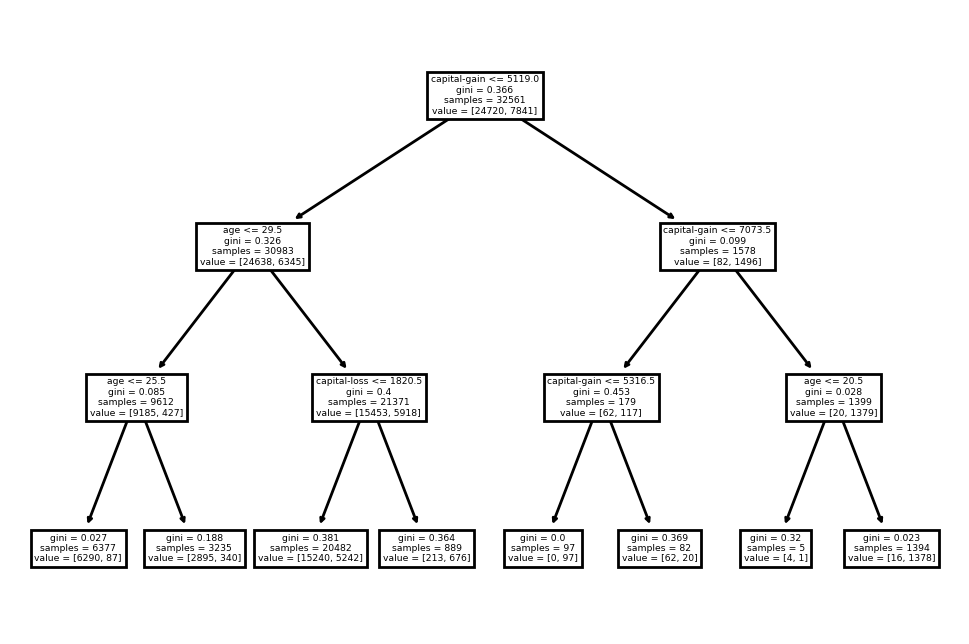

In [28]:
plt.figure(dpi=200)
plot_tree(tree_model, feature_names=X.columns)
None

## Partial Dependence

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gbt = GradientBoostingClassifier().fit(X, y)

In [31]:
from sklearn.inspection import PartialDependenceDisplay

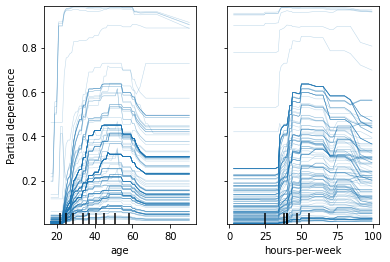

In [33]:
PartialDependenceDisplay.from_estimator(gbt, X.sample(200),
                                        ['age', 'hours-per-week'],
                                        kind='individual')

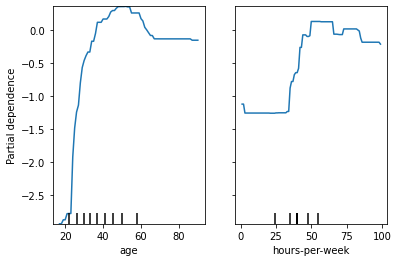

In [36]:
PartialDependenceDisplay.from_estimator(gbt, X,
                                        ['age', 'hours-per-week'])

In [37]:
from sklearn.linear_model import LogisticRegression

In [39]:
log_reg = LogisticRegression(max_iter=1_000).fit(X, y)

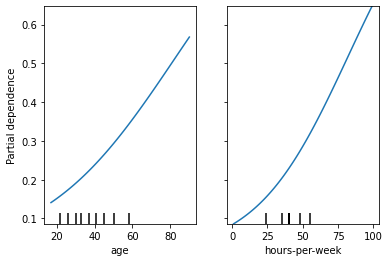

In [40]:
PartialDependenceDisplay.from_estimator(log_reg, X,
                                        ['age', 'hours-per-week'])

In [41]:
from sklearn.model_selection import cross_val_score

<AxesSubplot:>

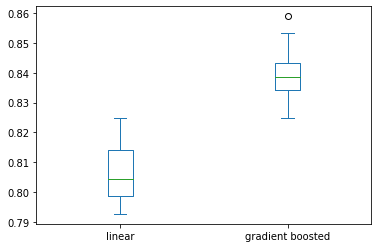

In [42]:
pandas.DataFrame(
    {'linear': cross_val_score(log_reg, X, y, cv=30),
     'gradient boosted': cross_val_score(gbt, X, y, cv=30)
    }).plot.box()

In [43]:
import shap

In [44]:
shap.initjs()

In [57]:
explainer = shap.Explainer(log_reg, X)
shap_values = explainer(X.sample(1_000))

In [58]:
shap.force_plot(shap_values[5])

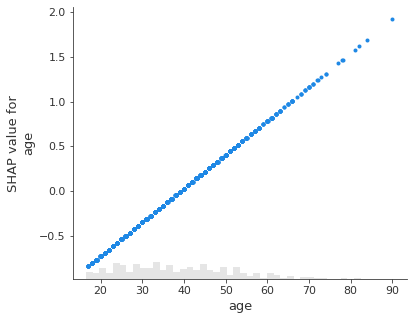

In [59]:
shap.plots.scatter(shap_values[:, 'age'])

In [60]:
gb_explainer = shap.Explainer(gbt, X)
gb_shap = gb_explainer(X.sample(1_000))

In [61]:
shap.force_plot(gb_shap[5])

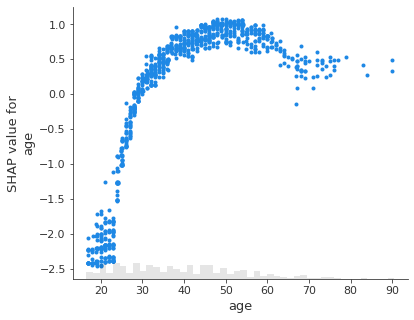

In [62]:
shap.plots.scatter(gb_shap[:, 'age'])

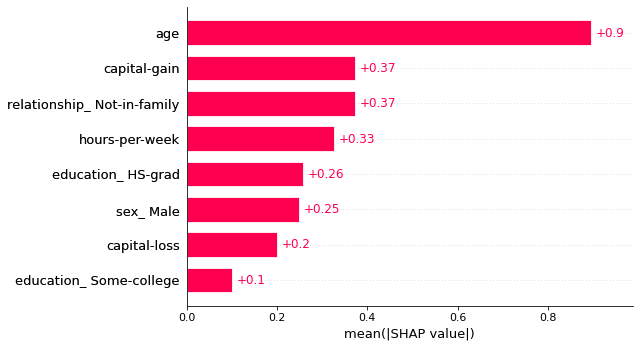

In [63]:
shap.plots.bar(gb_shap)

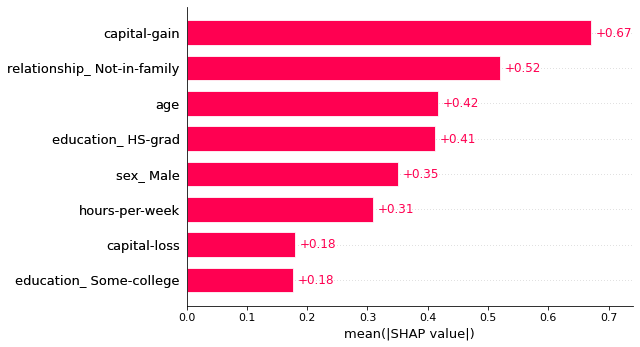

In [64]:
shap.plots.bar(shap_values)

## Fairness

In [65]:
from sklego.metrics import p_percent_score, equal_opportunity_score

In [66]:
z = 'sex_ Male'

In [67]:
p_percent_score(z)(gbt, X, y)

0.1779847896015183

In [68]:
equal_opportunity_score(z)(gbt, X, y)

0.6001225324605203

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklego.preprocessing import InformationFilter

In [72]:
clf_drop = Pipeline(steps=[
    ('drop z', ColumnTransformer([('drop z', 'drop', z)],
                                remainder='passthrough')),
    ('gbt', GradientBoostingClassifier())
]).fit(X, y)

In [78]:
clf_if = Pipeline(steps=[
    ('drop z', InformationFilter(z, 0.5)),
    ('gbt', GradientBoostingClassifier())
]).fit(X, y)

In [74]:
p_percent_score(z)(clf_drop, X, y)

0.32864421390097787

In [75]:
equal_opportunity_score(z)(clf_drop, X, y)

0.793360235090515

In [79]:
p_percent_score(z)(clf_if, X, y)

0.17250971476810145

In [80]:
equal_opportunity_score(z)(clf_if, X, y)

0.5678081406340558

<AxesSubplot:>

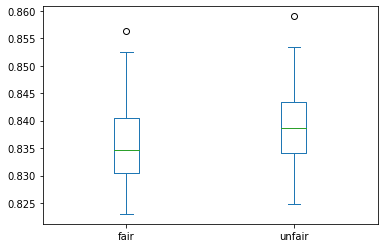

In [81]:
pandas.DataFrame(
    {'fair': cross_val_score(clf_drop, X, y, cv=30),
     'unfair': cross_val_score(gbt, X, y, cv=30)
    }).plot.box()